# Fig.2 i & j, validation set approach

In [1]:
import numpy as np
import torch
from torch import nn, optim
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
def vali_net(N,P,P_test,val_frac,SNR,nepoch,repeat):
    '''plot estimated generalization error and true generalization error as a function of train/val split ratio'''
    
    Et = np.zeros((nepoch,repeat))
    Ev = np.zeros((nepoch,repeat))
    Eg = np.zeros((nepoch,repeat))

    for r in range(repeat):
        #print(r)
        
        torch.manual_seed(r)


        if SNR == np.inf:
            variance_w = 1;
            variance_e = 0;
        else:
            variance_w = SNR/(SNR + 1);
            variance_e = 1/(SNR + 1);


        noise_train = torch.normal(0, variance_e**0.5, size = [P,1])
        noise_test = torch.normal(0, variance_e**0.5, size = [P_test,1])


        W_t = torch.normal(0, variance_w**0.5, size=(N, 1))
        
        # generate a pool of examples
        train_x_pool = torch.normal(0, (1/N)**0.5, size=(P, N))
        train_y_pool = torch.matmul(train_x_pool, W_t) + noise_train
        
        # generate test set
        test_x = torch.normal(0, (1/N)**0.5, size=(P_test, N))
        test_y = torch.matmul(test_x, W_t) + noise_test
        
        # split pool into train set and validation set
        vali_ind = np.random.choice(P, int(np.floor(P*val_frac)), replace=False)
        train_ind = np.setdiff1d(np.arange(P), vali_ind)

        train_x = train_x_pool[train_ind,:]
        train_y = train_y_pool[train_ind,:]


        vali_x = train_x_pool[vali_ind,:]
        vali_y = train_y_pool[vali_ind,:]

        model = nn.Sequential(nn.Linear(N,1,bias=False))
        optimizer = optim.SGD(model.parameters(), lr=0.05*(N/2)) # to match the learnrate in the matlab implementation.
        
        with torch.no_grad():
            list(model.parameters())[0].zero_()

        for i in range(nepoch):
            optimizer.zero_grad()
            train_error = criterion(train_y, model(train_x))
            train_error.backward()
            optimizer.step()
            Et[i,r] = train_error.detach().numpy()
            with torch.no_grad():
                vali_error = criterion(vali_y, model(vali_x))
                test_error = criterion(test_y, model(test_x))
                Ev[i,r] = vali_error.numpy()
                Eg[i,r] = test_error.numpy()
    return Et,Ev,Eg
 
  
    
def criterion(y, y_hat):
    return (y - y_hat).pow(2).mean()


In [3]:
SNR_range = [0.05,4, np.inf]
nepoch = 1000
repeat = 100
N = 100
P_vec = [50,100,300,500,1000] 
P_test = 1000
#val_frac_vec = [0.02,0.05,0.1,0.3,0.6,0.9]
val_frac_vec = np.arange(0.02,0.98,0.02)
snr_len = len(SNR_range)

Et_big = np.zeros((len(P_vec),len(val_frac_vec),snr_len,nepoch,repeat))
Ev_big = np.zeros((len(P_vec),len(val_frac_vec),snr_len,nepoch,repeat))
Eg_big = np.zeros((len(P_vec),len(val_frac_vec),snr_len,nepoch,repeat))

for p,P in enumerate(P_vec):
    print('P = ' + str(P))
    for f, frac in enumerate(val_frac_vec):
        print('frac = ' + str(frac))
        for i,SNR in enumerate(SNR_range):
            print('SNR = ' + str(SNR))
            Et_big[p,f,i,:,:],Ev_big[p,f,i,:,:],Eg_big[p,f,i,:,:]= vali_net(N,P,P_test,frac,SNR,nepoch,repeat)




P = 50
frac = 0.02
SNR = 0.05
SNR = 4
SNR = inf
frac = 0.04
SNR = 0.05
SNR = 4
SNR = inf
frac = 0.06
SNR = 0.05
SNR = 4
SNR = inf
frac = 0.08
SNR = 0.05
SNR = 4
SNR = inf
frac = 0.1
SNR = 0.05
SNR = 4
SNR = inf
frac = 0.12000000000000001
SNR = 0.05
SNR = 4
SNR = inf
frac = 0.13999999999999999
SNR = 0.05
SNR = 4
SNR = inf
frac = 0.16
SNR = 0.05
SNR = 4
SNR = inf
frac = 0.18
SNR = 0.05
SNR = 4
SNR = inf
frac = 0.19999999999999998
SNR = 0.05
SNR = 4
SNR = inf
frac = 0.22
SNR = 0.05
SNR = 4
SNR = inf
frac = 0.24
SNR = 0.05
SNR = 4
SNR = inf
frac = 0.26
SNR = 0.05
SNR = 4
SNR = inf
frac = 0.28
SNR = 0.05
SNR = 4
SNR = inf
frac = 0.30000000000000004
SNR = 0.05
SNR = 4
SNR = inf
frac = 0.32
SNR = 0.05
SNR = 4
SNR = inf
frac = 0.34
SNR = 0.05
SNR = 4
SNR = inf
frac = 0.36000000000000004
SNR = 0.05
SNR = 4
SNR = inf
frac = 0.38
SNR = 0.05
SNR = 4
SNR = inf
frac = 0.4
SNR = 0.05
SNR = 4
SNR = inf
frac = 0.42000000000000004
SNR = 0.05
SNR = 4
SNR = inf
frac = 0.44
SNR = 0.05
SNR = 4
SNR = inf
fra

SNR = 4
SNR = inf
frac = 0.78
SNR = 0.05
SNR = 4
SNR = inf
frac = 0.8
SNR = 0.05
SNR = 4
SNR = inf
frac = 0.8200000000000001
SNR = 0.05
SNR = 4
SNR = inf
frac = 0.8400000000000001
SNR = 0.05
SNR = 4
SNR = inf
frac = 0.86
SNR = 0.05
SNR = 4
SNR = inf
frac = 0.88
SNR = 0.05
SNR = 4
SNR = inf
frac = 0.9
SNR = 0.05
SNR = 4
SNR = inf
frac = 0.92
SNR = 0.05
SNR = 4
SNR = inf
frac = 0.9400000000000001
SNR = 0.05
SNR = 4
SNR = inf
frac = 0.9600000000000001
SNR = 0.05
SNR = 4
SNR = inf
P = 1000
frac = 0.02
SNR = 0.05
SNR = 4
SNR = inf
frac = 0.04
SNR = 0.05
SNR = 4
SNR = inf
frac = 0.06
SNR = 0.05
SNR = 4
SNR = inf
frac = 0.08
SNR = 0.05
SNR = 4
SNR = inf
frac = 0.1
SNR = 0.05
SNR = 4
SNR = inf
frac = 0.12000000000000001
SNR = 0.05
SNR = 4
SNR = inf
frac = 0.13999999999999999
SNR = 0.05
SNR = 4
SNR = inf
frac = 0.16
SNR = 0.05
SNR = 4
SNR = inf
frac = 0.18
SNR = 0.05
SNR = 4
SNR = inf
frac = 0.19999999999999998
SNR = 0.05
SNR = 4
SNR = inf
frac = 0.22
SNR = 0.05
SNR = 4
SNR = inf
frac = 0.24
SN

In [4]:
# np.save('Et_big.npy',Et_big)
# np.save('Eg_big.npy',Eg_big)
# np.save('Ev_big.npy',Ev_big)

In [4]:
# Et_big = np.load('Et_big.npy')
# Eg_big = np.load('Eg_big.npy')
# Ev_big = np.load('Ev_big.npy')




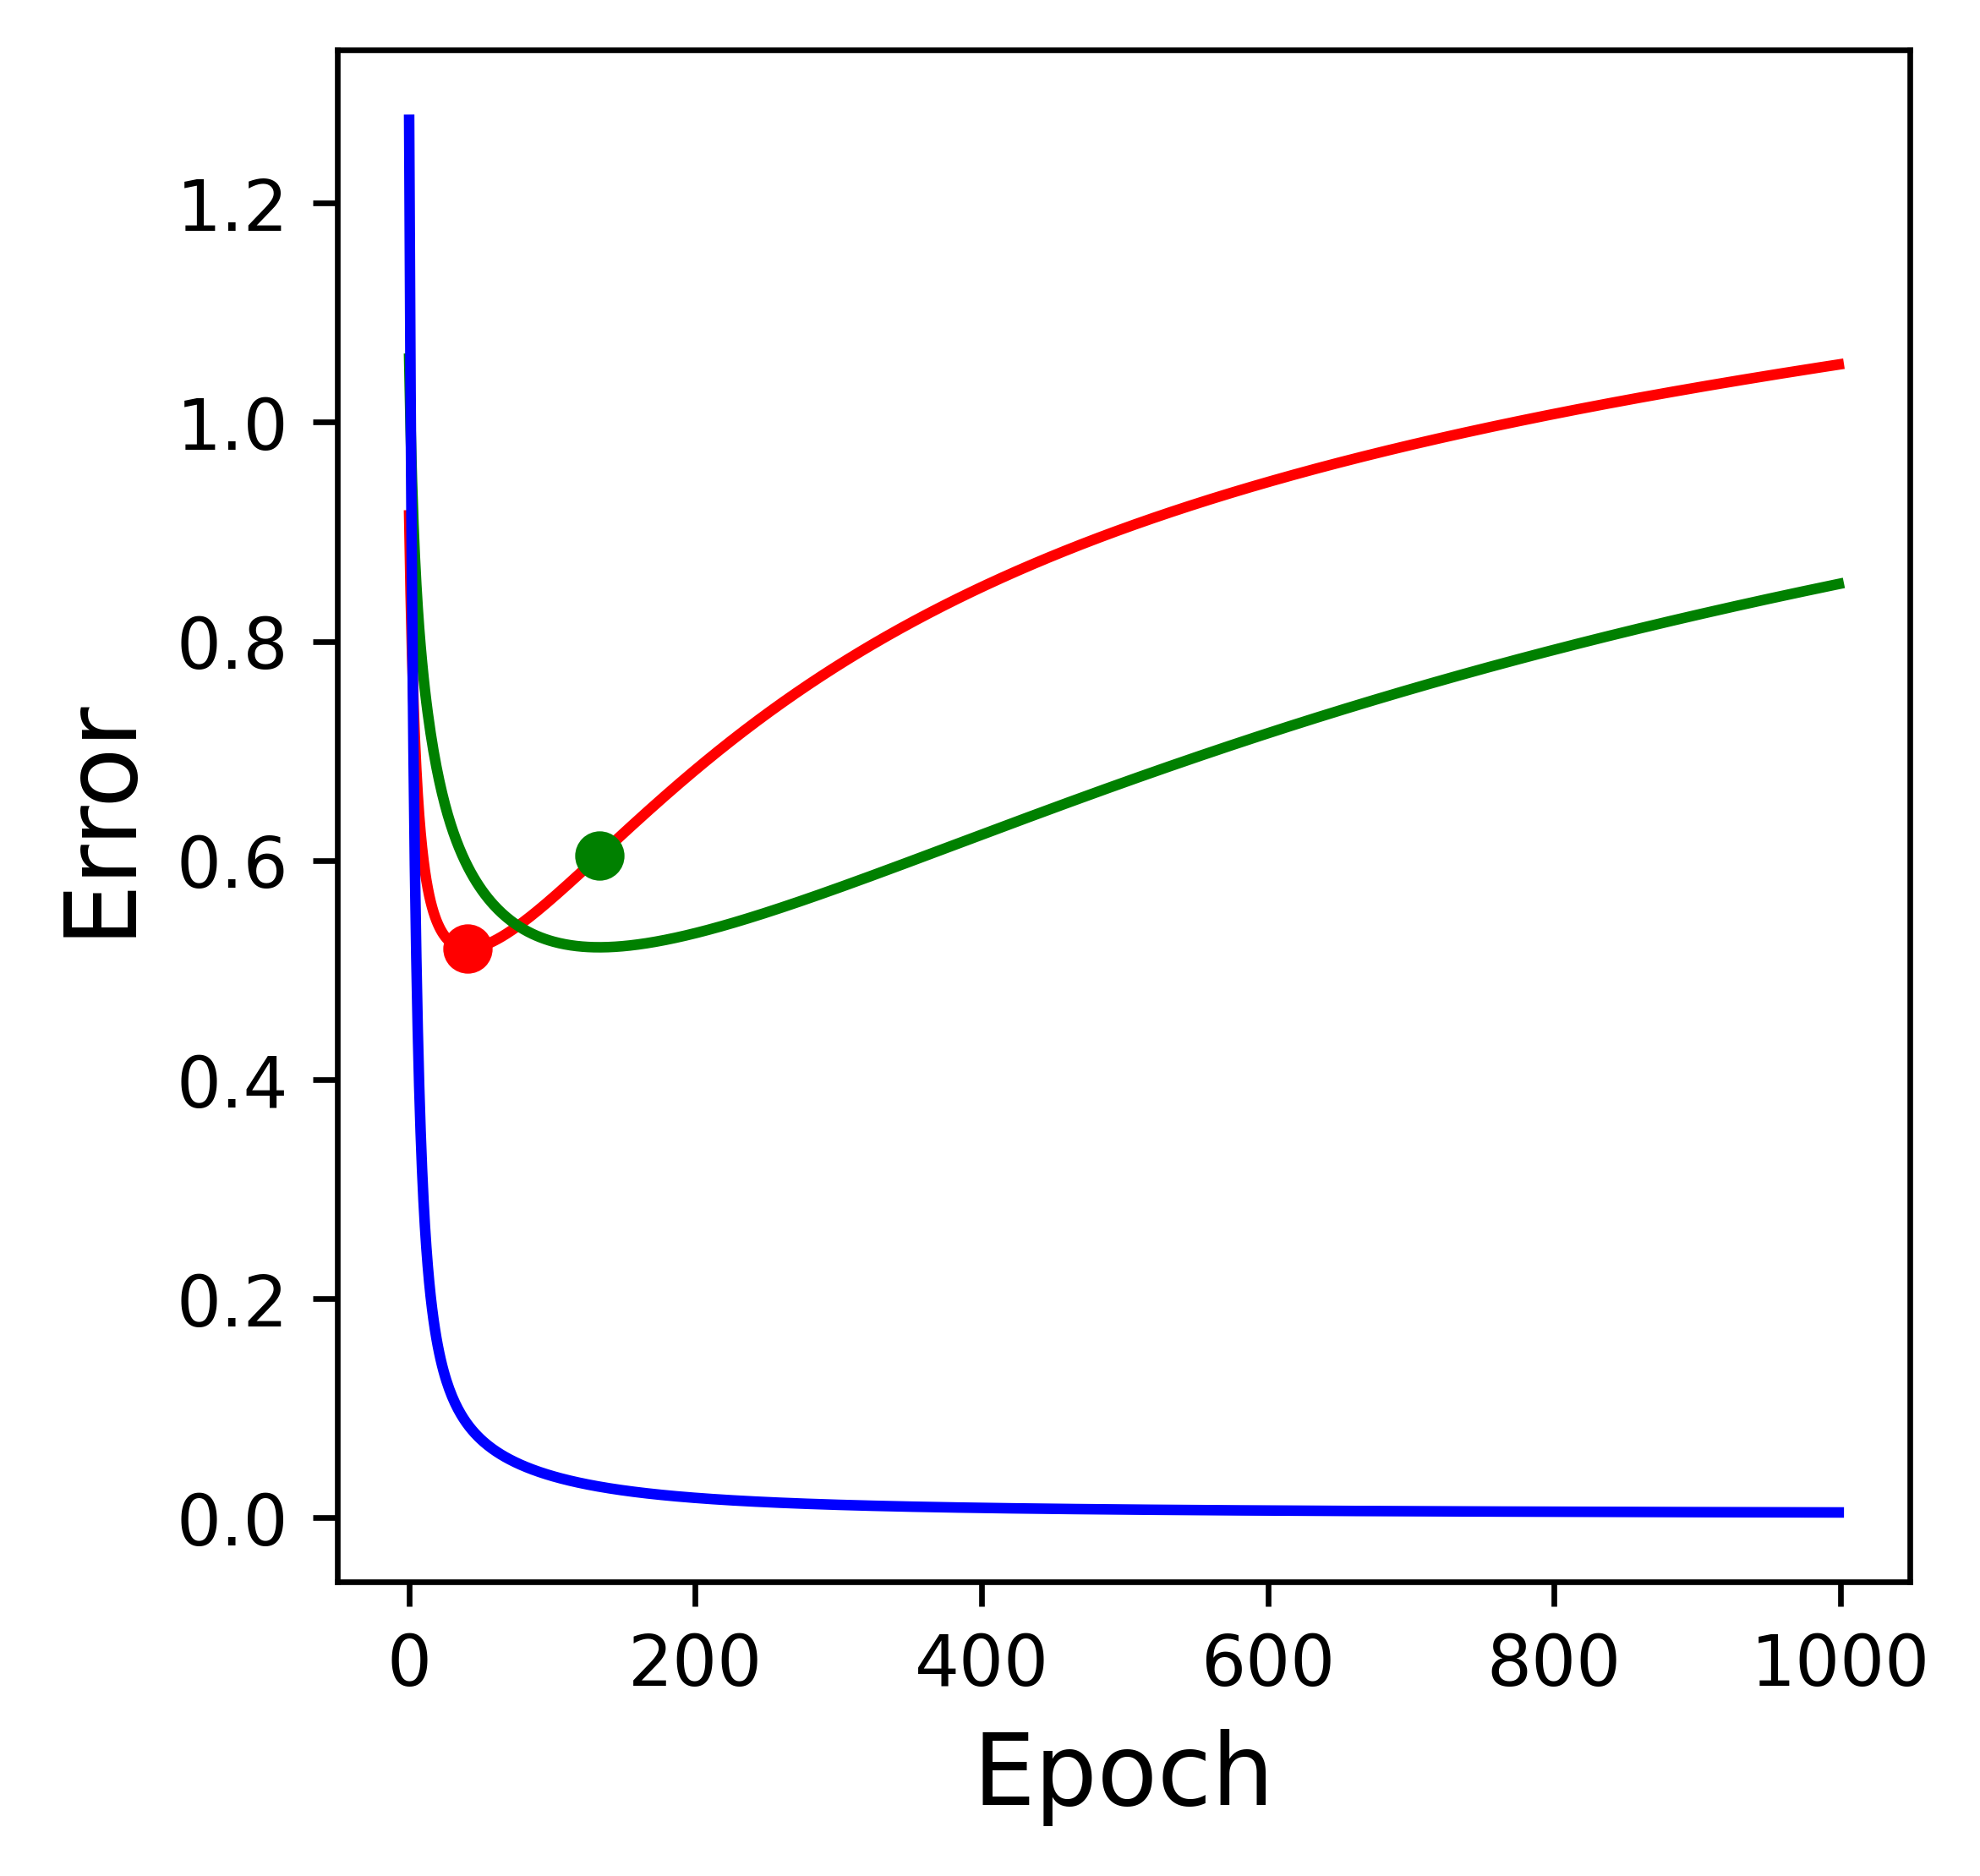

In [20]:
n=58
Ev = Ev_big[1,4,1,:,n]
Eg = Eg_big[1,4,1,:,n]
Et = Et_big[1,4,1,:,n]

plt.figure(figsize = (4,4),dpi =600)
plt.plot(Eg,'r', label = 'Generalization',rasterized=False,zorder=1)
plt.scatter(np.argmin(Eg),Eg[np.argmin(Eg)],color = 'red',rasterized=False,zorder=2)
plt.plot(Ev,'g',label = 'Validation')
plt.scatter(np.argmin(Ev),Eg[np.argmin(Ev)],color = 'green',rasterized=False,zorder=2)
plt.plot(Et,'b', label = 'Memory',rasterized=False)


plt.xlabel('Epoch',fontsize = '14')
plt.ylabel('Error',fontsize = '14')
#plt.legend()

plt.savefig('fig2i.pdf')




In [17]:
SNR_range = [0.05,4, np.inf]
nepoch = 1000
repeat = 100
N = 100
P_vec = [50,100,300,500,1000] 
P_test = 1000
#val_frac_vec = [0.02,0.05,0.1,0.3,0.6,0.9]
val_frac_vec = np.arange(0.02,0.98,0.02)
snr_len = len(SNR_range)


mse_est = np.zeros((len(P_vec),len(val_frac_vec),len(SNR_range)))
gen_tru = np.zeros((len(P_vec),len(val_frac_vec),len(SNR_range)))
gen_est = np.zeros((len(P_vec),len(val_frac_vec),len(SNR_range)))

for p,P in enumerate(P_vec):

    for f, frac in enumerate(val_frac_vec):
    #%print('frac = ' + str(frac))
        for i,SNR in enumerate(SNR_range):

            mse_est[p,f,i] = ((np.min(Eg_big[p,f,i,:,:], axis = 0)-np.min(Ev_big[p,f,i,:,:], axis = 0))**2).mean()
            gen_tru [p,f,i] = np.min(Eg_big[p,f,i,:,:], axis = 0).mean()
            gen_est [p,f,i] = Eg_big[p,f,i,np.argmin(Ev_big[p,f,i,:,:],axis = 0),range(repeat)].mean()

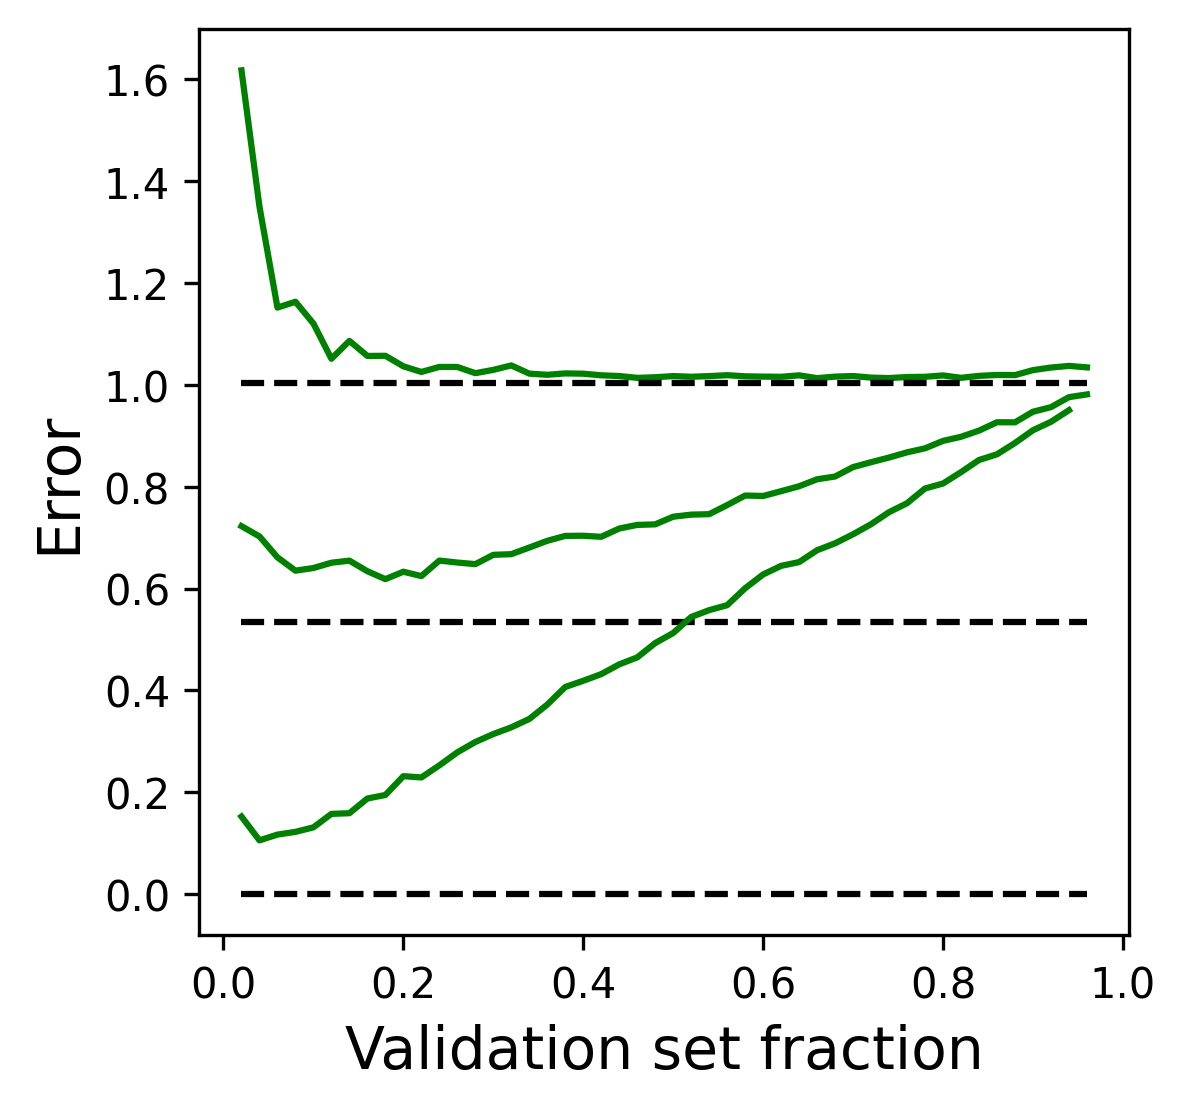

In [21]:
plt.figure(figsize = (4,4),dpi = 300)
for i in range(len(SNR_range)):
    plt.plot(val_frac_vec,gen_est[1,:,i],'g-',markersize= 3)
    #plt.scatter(val_frac_vec[np.nanargmin(gen_est[1,:,i])],gen_est[1,np.nanargmin(gen_est[1,:,i]),i],color = 'green')

    #plt.plot(val_frac_vec,gen_tru[1,:,i],'r-')
    plt.plot(val_frac_vec,np.full(val_frac_vec.shape,np.nanmin(gen_tru[i,:,i])),'k--')

    
plt.xlabel('Validation set fraction',fontsize = '14')
plt.ylabel('Error',fontsize = '14')
plt.savefig('fig2j.pdf')



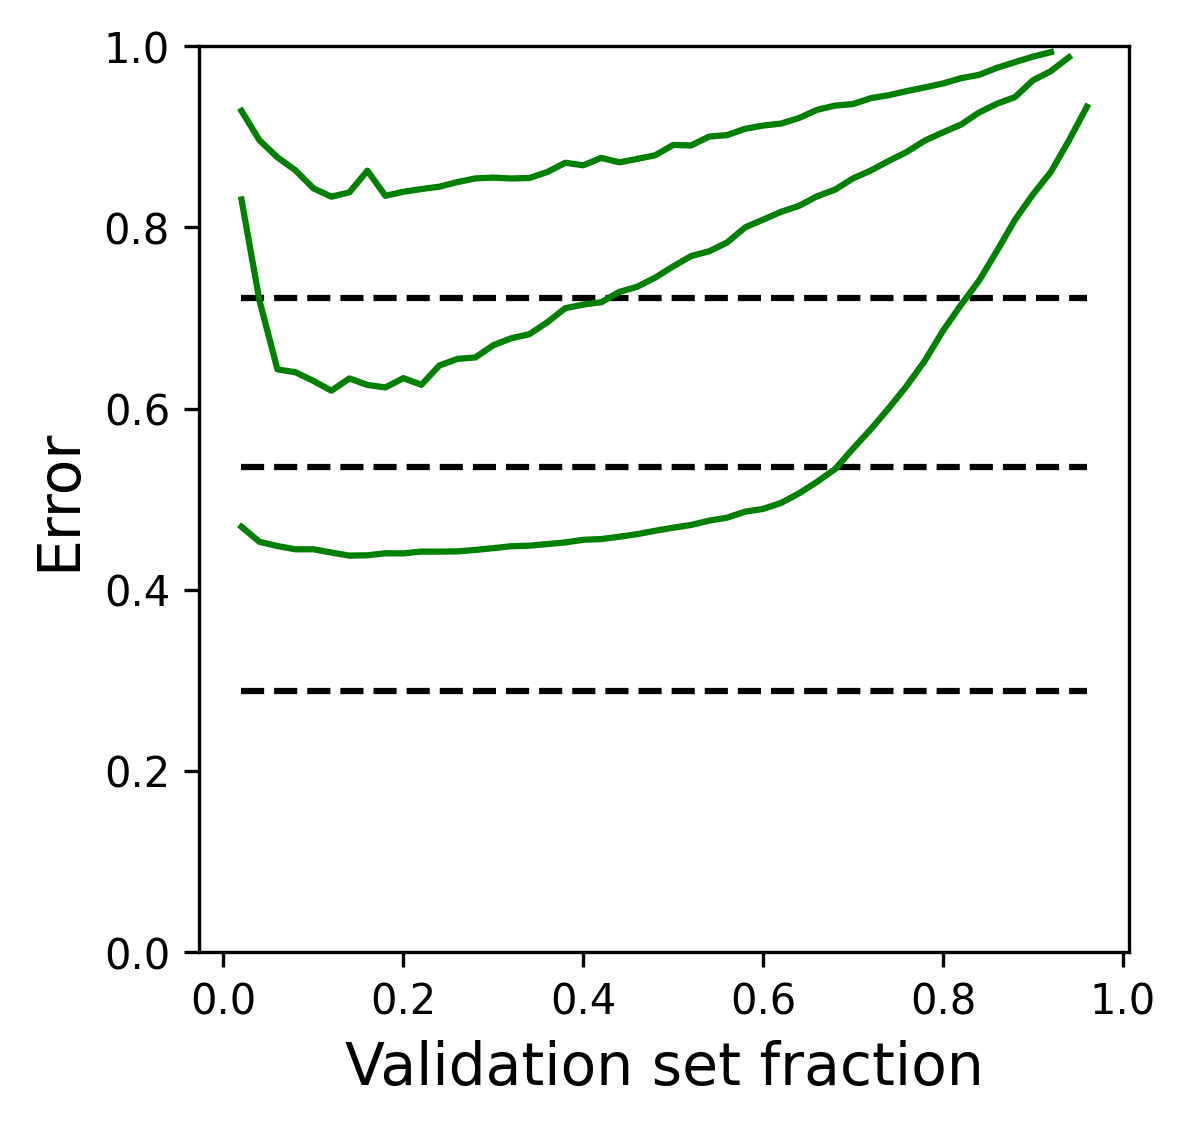

In [22]:
# plt.figure(figsize = (4,4),dpi = 300)
# for i in range(3):
#     plt.plot(val_frac_vec,gen_est[i,:,:].mean(axis = 1),'g-')
#     plt.plot(val_frac_vec,np.full(val_frac_vec.shape,np.nanmin(gen_tru[i,:,1])),'k--')
    
# plt.xlabel('Validation set fraction',fontsize = '14')
# plt.ylabel('Error',fontsize = '14')
# plt.ylim(0,1)
# plt.savefig('fig2_val_alpha.pdf')


